In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arcs_prob_ss(sequence, base_pairs, dot_bracket=None, 
                      width_arc=2, text_size=12, fig_size=None):

    rna_length = len(sequence)

    if fig_size is None:
        fig_size = (rna_length//10, 6)
    fig, ax = plt.subplots(figsize=fig_size)
    
    # Get base pairs from dot bracket
    def get_dot_bracket_pairs(dot_bracket):
        stack = []
        pairs = []
        for i, char in enumerate(dot_bracket):
            if char == '(':
                stack.append(i + 1)
            elif char == ')':
                if stack:
                    j = stack.pop()
                    pairs.append((j, i + 1))
        return pairs

    if dot_bracket is None:
        secondary_structure_pairs = None
    else:
        secondary_structure_pairs = get_dot_bracket_pairs(dot_bracket)

    # Functions to draw upper and lower arcs
    def plot_arc_upper(ax, i, j, color, y_shift):
        height = 0.5*(j - i)
        x0 = i + height
        x = np.linspace(i, j, 10*(j-i))
        y = y_shift + np.sqrt(height**2 - (x - x0)**2)
        ax.plot(x, y, color=color, lw=width_arc)

    def plot_arc_lower(ax, i, j, color, y_shift):
        height = 0.5*(j - i)
        x0 = i + height
        x = np.linspace(i, j, 10*(j-i))
        y = - y_shift - np.sqrt(height**2 - (x - x0)**2)
        ax.plot(x, y, color=color, lw=width_arc)

    # Draw upper arc for the probabilities
    for idx, (i, j, p) in enumerate(base_pairs):
        color = plt.cm.viridis(p)
        plot_arc_upper(ax, i, j, color, text_size/10) #0.2でy方向にシフトして文字と重ならないようにする

    # Draw lower arc for the secondary structure
    if secondary_structure_pairs is not None:
        for idx, (i, j) in enumerate(secondary_structure_pairs):
            plot_arc_lower(ax, i, j, 'black', text_size/10)  # -0.2でy方向にシフトして文字と重ならないようにする

    # Write nucleotide sequence
    for i, base in enumerate(sequence, start=1):
        ax.text(i, 0, base, ha='center', va='center', fontsize=text_size, color='black')

    # ax setting
    ax.set_xlim(0, rna_length + 1)
    #ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])

    # Delete ax frames
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add color scale
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.ax.tick_params(labelsize=text_size)
    cbar.set_label('Pairing Probability', fontsize=text_size)
    return fig, ax

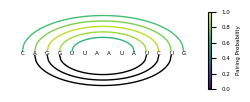

In [2]:
# Sample data demo
sequence = "CAGGUUAAUAUCUG"
base_pairs = [(1, 14, 0.7), (2, 13, 0.8), (3, 12, 0.9), (4, 11, 0.85), (5, 10, 0.65)]
dot_bracket = ".(((......)))."

draw_arcs_prob_ss(sequence, base_pairs, dot_bracket, fig_size=(3,1), text_size=4, width_arc=1)
plt.show()

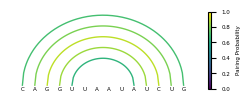

In [3]:
# Sample data demo
sequence = "CAGGUUAAUAUCUG"
base_pairs = [(1, 14, 0.7), (2, 13, 0.8), (3, 12, 0.9), (4, 11, 0.85), (5, 10, 0.65)]
dot_bracket = ".(((......)))."

draw_arcs_prob_ss(sequence, base_pairs, dot_bracket=None, fig_size=(3,1), text_size=4, width_arc=1)
plt.show()